<b>Homework02-Linear regression from scratch
>Kevin Yang 50541650

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
np.random.seed(2019)

In [2]:
def linear_function(x, m=1, b=0):
    return m * float(x) +b

In [3]:
def gaussian_noise(mu=0, sigma=1):
    return np.random.normal(mu, sigma)

In [4]:
def zero():
    return 0

In [5]:
def add_noise(values, **args):
    return np.apply_along_axis(lambda x: x+ gaussian_noise(**args), 0, values)

In [6]:
f1 = lambda x: linear_function(x, 0.8, -1.7)

In [7]:
X = np.array([i for i in range(1,201)])

In [8]:
np.random.shuffle(X)

In [9]:
y_clean = np.array([f1(x) for x in X], dtype = float)
noise = np.random.normal(scale=4, size=(len(y_clean),))
y = y_clean + noise

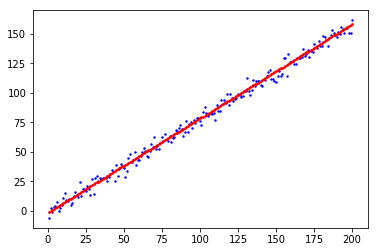

In [10]:
plt.scatter(X,y, color='blue', s=2)
plt.scatter(X,y_clean, color='red', s=3)
plt.show()

In [11]:
sum_x = 0
sum_squ = 0
rt = 0
rt_xt = 0
i = 0
for i in range(X.size):
    sum_x = sum_x + X[i]
    sum_squ = sum_squ + (X[i] * X[i])
    rt = rt + y[i]
    rt_xt = rt_xt + X[i]* y[i]

In [12]:
A = np.array([[X.size, sum_x],[sum_x, sum_squ]])
Y = np.array([[rt],[rt_xt]])
Ainv = inv(A)
W = np.dot(Ainv, Y)
print(W)

[[-1.68834462]
 [ 0.79606961]]


In [13]:
y_pred = np.zeros(X.shape)
for i in range(len(X)):
    y_pred[i] = W[1] * X[i] + W[0]

In [14]:
tem_result = 0
i = 0
for i in range(X.size):
    tem_result = tem_result + ((y[i]-y_pred[i])*(y[i]-y_pred[i]))

MSE = tem_result /200
print(MSE)

14.760249583431278


In [15]:
tem_result1 = 0
i = 0
for i in range(X.size):
    tem_result1 = tem_result1 + ((y[i]-y_pred[i])/y[i])
    
MPE = tem_result1 * 100/ 200
print(MPE)

9.059412021476763


In [16]:
SSres = tem_result
avg_y = 0
i = 0
for i in range(X.size):
    avg_y = avg_y + y[i]
    
    
avg_y = avg_y / X.size
tem = 0
i = 0
for i in range(X.size):
    tem = tem + ((y[i]-avg_y)*(y[i]-avg_y))

SStot = tem

R2 = 1 - (SSres / SStot)
print(R2)

0.9930609561921012
